In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
inputFile = "MAESTRO-d6178bdd-identified_variants_merged_protein_regions-main.tsv"
data = pd.read_csv(inputFile,sep='\t',low_memory=False)

In [3]:
data
#print(data.columns)

,rowid,ccms_row_id,Algorithm,Filename,Cluster_index,Peptide,Unmodified_sequence,Charge,_dyn_#Intensity_for_cluster,_dyn_#Intensity_for_unmodified_sequence,...,PSP_site_match,DrugBank_drugs,Parent_mass,Num_PSP_Drugbank_events,Start_AA_1_based,End_AA_1_based,Num_spectra_for_cluster,Num_spectra_for_unmodified_sequence,Num_spectra_for_peptide_variant,Internal_ref_orig_intensity
0,1,1,.MODA.,specs_ms.mgf,960991,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V",.GARLIPEMDQIFTEVEMTTLEK.,4,36.905893,36.905893,...,NaN,NaN,1580.81,0,NaN,NaN,1,1,1,8.204159e+03
1,2,2,.MODA.,specs_ms.mgf,763982,"I.[304.207]FTEVEMTTLE(K,304.207).V",.FTEVEMTTLEK.,3,11.686782,11.686782,...,NaN,NaN,1934.91,0,NaN,NaN,1,2,2,4.936894e+05
2,3,3,.MSGFPLUS.,specs_ms.mgf,902201,K.[304.207]LYQPEYQEVSTEEQR.E,.LYQPEYQEVSTEEQR.,3,15.690234,15.690234,...,NaN,NaN,2203.09,0,NaN,NaN,5,6,6,1.951566e+05
3,4,4,.MSGFPLUS.,specs_ms.mgf,935503,"K.[304.207]AANSLEAFIFETQD(K,304.207).L",.AANSLEAFIFETQDK.,3,15.016824,15.016824,...,NaN,NaN,2292.24,0,NaN,NaN,3,4,4,2.877781e+06
4,5,5,.MODA.,specs_ms.mgf,297961,"R.[304.207]YSHDF(N,-56.985)FH.I",.YSHDFNFH.,3,33.768015,33.768015,...,NaN,NaN,1313.66,0,NaN,NaN,3,3,3,7.088440e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101456,101457,101457,.MODA.,specs_ms.mgf,480358,"K.[304.207]YLGE(E,-68.078)YV(K,304.207).A",.YLGEEYVK.,3,15.671927,14.867811,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,1027.56,1,NaN,NaN,2,1072,2,2.338236e+04
101457,101458,101458,.MODA.,specs_ms.mgf,237950,"K.[304.207]YL(G,55.921)EEYV(K,304.207).A",.YLGEEYVK.,4,13.932377,14.867811,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,1664.83,1,NaN,NaN,2,1072,2,5.700355e+04
101458,101459,101459,.MODA.,specs_ms.mgf,1037953,"K.{187.018}[304.207]YLGEEYV(K,304.207).A",.YLGEEYVK.,2,14.412538,14.867811,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,1795.93,1,NaN,NaN,3,1072,3,3.027917e+05
101459,101460,101460,.MODA.,specs_ms.mgf,1022758,"R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A",.NTYEKYLGEEYVK.,3,13.872686,22.237222,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,2605.44,1,NaN,NaN,5,17,8,9.954486e+04


In [4]:
data = data.iloc[:,1:-1]

In [5]:
label_encoder = preprocessing.LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

In [6]:
corr = data.corr()

<AxesSubplot:>

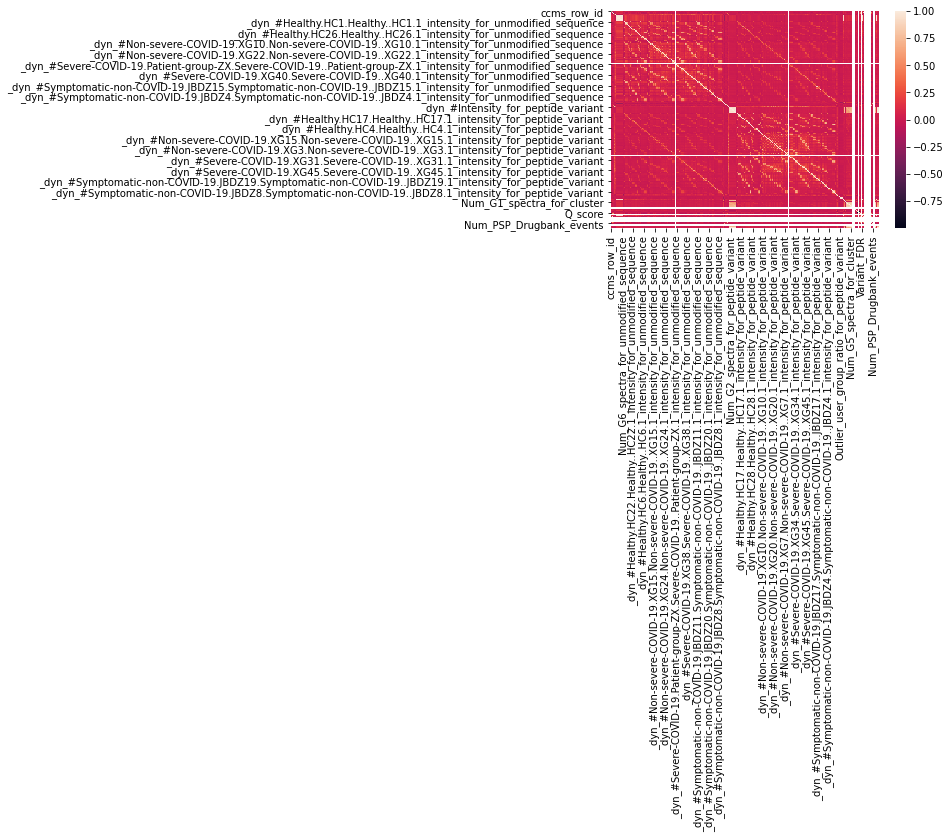

In [7]:
sns.heatmap(corr)

In [8]:
data_processed = data[['Peptide'] + [c for c in data.columns if 'intensity_for_peptide_variant' in c]]


In [9]:
data_processed.replace(0.0,np.nan,inplace=True)
data_processed

/tmp/ipykernel_85/2822839935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_processed.replace(0.0,np.nan,inplace=True)


,Peptide,_dyn_#Empty.Empty.Empty..Empty.1_intensity_for_peptide_variant,_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for_peptide_variant,_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_for_peptide_variant,_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_for_peptide_variant,_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_for_peptide_variant,_dyn_#Healthy.HC17.Healthy..HC17.1_intensity_for_peptide_variant,_dyn_#Healthy.HC19.Healthy..HC19.1_intensity_for_peptide_variant,_dyn_#Healthy.HC2.Healthy..HC2.1_intensity_for_peptide_variant,_dyn_#Healthy.HC20.Healthy..HC20.1_intensity_for_peptide_variant,...,_dyn_#Symptomatic-non-COVID-19.JBDZ24.Symptomatic-non-COVID-19..JBDZ24.1_intensity_for_peptide_variant,_dyn_#Symptomatic-non-COVID-19.JBDZ25.Symptomatic-non-COVID-19..JBDZ25.1_intensity_for_peptide_variant,_dyn_#Symptomatic-non-COVID-19.JBDZ3.Symptomatic-non-COVID-19..JBDZ3.1_intensity_for_peptide_variant,_dyn_#Symptomatic-non-COVID-19.JBDZ4.Symptomatic-non-COVID-19..JBDZ4.1_intensity_for_peptide_variant,_dyn_#Symptomatic-non-COVID-19.JBDZ5.Symptomatic-non-COVID-19..JBDZ5.1_intensity_for_peptide_variant,_dyn_#Symptomatic-non-COVID-19.JBDZ6.Symptomatic-non-COVID-19..JBDZ6.1_intensity_for_peptide_variant,_dyn_#Symptomatic-non-COVID-19.JBDZ7.Symptomatic-non-COVID-19..JBDZ7.1_intensity_for_peptide_variant,_dyn_#Symptomatic-non-COVID-19.JBDZ8.Symptomatic-non-COVID-19..JBDZ8.1_intensity_for_peptide_variant,_dyn_#Symptomatic-non-COVID-19.JBDZ9.Symptomatic-non-COVID-19..JBDZ9.1_intensity_for_peptide_variant,_dyn_#Symptomatic-non-COVID-19.Patient-group-jbdz.Symptomatic-non-COVID-19..Patient-group-jbdz.1_intensity_for_peptide_variant
0,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V",2.459416,NaN,6.645649,3.391896,1.919552,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"I.[304.207]FTEVEMTTLE(K,304.207).V",0.961707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.435434,0.736280,0.796550,1.144616
2,K.[304.207]LYQPEYQEVSTEEQR.E,0.326271,0.935916,NaN,NaN,NaN,0.286530,0.177772,0.987496,0.220930,...,NaN,NaN,1.232362,NaN,NaN,NaN,0.200232,0.170478,0.197400,0.047076
3,"K.[304.207]AANSLEAFIFETQD(K,304.207).L",0.878024,NaN,NaN,NaN,NaN,1.259306,0.629756,NaN,0.781082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"R.[304.207]YSHDF(N,-56.985)FH.I",0.170619,NaN,NaN,NaN,NaN,NaN,0.238642,NaN,0.272645,...,0.796323,0.832859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101456,"K.[304.207]YLGE(E,-68.078)YV(K,304.207).A",1.007395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.670534,1.330314,1.204776,1.179248
101457,"K.[304.207]YL(G,55.921)EEYV(K,304.207).A",0.353838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.304344,0.532133,0.549213,0.612275
101458,"K.{187.018}[304.207]YLGEEYV(K,304.207).A",0.302468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.198143,0.202111,0.143696,NaN,NaN,NaN,0.496508
101459,"R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A",0.735814,0.370040,NaN,NaN,NaN,0.791905,1.077970,0.420246,3.523790,...,NaN,NaN,0.221658,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data_processed = data_processed.set_index("Peptide")

In [11]:
data_processed.isna().sum()

_dyn_#Empty.Empty.Empty..Empty.1_intensity_for_peptide_variant                                                                     1294
_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for_peptide_variant                                                                    56127
_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_for_peptide_variant                                                                  64835
_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_for_peptide_variant                                                                  65103
_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_for_peptide_variant                                                                  65109
                                                                                                                                  ...  
_dyn_#Symptomatic-non-COVID-19.JBDZ6.Symptomatic-non-COVID-19..JBDZ6.1_intensity_for_peptide_variant                              67731
_dyn_#Symptomatic-non-COVID-19.JBDZ7.Symptomatic

In [12]:
for c in data_processed.columns:
    print(data_processed[c].unique)

<bound method Series.unique of Peptide
K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V     2.459416
I.[304.207]FTEVEMTTLE(K,304.207).V                0.961707
K.[304.207]LYQPEYQEVSTEEQR.E                      0.326271
K.[304.207]AANSLEAFIFETQD(K,304.207).L            0.878024
R.[304.207]YSHDF(N,-56.985)FH.I                   0.170619
                                                    ...   
K.[304.207]YLGE(E,-68.078)YV(K,304.207).A         1.007395
K.[304.207]YL(G,55.921)EEYV(K,304.207).A          0.353838
K.{187.018}[304.207]YLGEEYV(K,304.207).A          0.302468
R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A    0.735814
K.[304.207]YLGE(E,125.898)YV(K,304.207).A         1.068300
Name: _dyn_#Empty.Empty.Empty..Empty.1_intensity_for_peptide_variant, Length: 101461, dtype: float64>
<bound method Series.unique of Peptide
K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V          NaN
I.[304.207]FTEVEMTTLE(K,304.207).V                     NaN
K.[304.207]LYQPEYQEVSTEEQR.E                      0.9

In [13]:
data_processed = data_processed.T
data_processed

Peptide,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.[304.207]FTEVEMTTLE(K,304.207).V",K.[304.207]LYQPEYQEVSTEEQR.E,"K.[304.207]AANSLEAFIFETQD(K,304.207).L","R.[304.207]YSHDF(N,-56.985)FH.I","R.[304.207](P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.[304.207]QGSTGEEFHFQTGGR.D,"K.[304.207]HGTDDGVVW(M,15.995)NW(K,304.207).G","K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G","K.[304.207]H(G,304.213)TDDGVVWMNW(K,304.207).G",...,"K.[304.207]YLGEE(Y,-21.617)V(K,304.207).A","K.[304.207]YLGEE(Y,-57.005)V(K,304.207).A","K.[304.207]YLGEE(Y,-58.064)V(K,304.207).A","K.[304.207]YLGEE(Y,-60.599)V(K,304.207).A","K.[304.207]YLGEE(Y,-63.608)V(K,304.207).A","K.[304.207]YLGE(E,-68.078)YV(K,304.207).A","K.[304.207]YL(G,55.921)EEYV(K,304.207).A","K.{187.018}[304.207]YLGEEYV(K,304.207).A","R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,125.898)YV(K,304.207).A"
_dyn_#Empty.Empty.Empty..Empty.1_intensity_for_peptide_variant,2.459416,0.961707,0.326271,0.878024,0.170619,0.570221,0.574879,0.914939,0.649916,0.017884,...,0.521673,0.240862,0.787867,1.144694,0.929711,1.007395,0.353838,0.302468,0.735814,1.068300
_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for_peptide_variant,NaN,NaN,0.935916,NaN,NaN,NaN,NaN,NaN,NaN,0.288821,...,NaN,1.958825,NaN,NaN,1.174198,NaN,NaN,NaN,0.370040,NaN
_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_for_peptide_variant,6.645649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026024,...,NaN,2.544654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_for_peptide_variant,3.391896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009033,...,NaN,0.913199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_for_peptide_variant,1.919552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028415,...,NaN,1.035449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_dyn_#Symptomatic-non-COVID-19.JBDZ6.Symptomatic-non-COVID-19..JBDZ6.1_intensity_for_peptide_variant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.622780,0.613630,0.020799,...,NaN,0.189781,NaN,NaN,NaN,NaN,NaN,0.143696,NaN,0.118712
_dyn_#Symptomatic-non-COVID-19.JBDZ7.Symptomatic-non-COVID-19..JBDZ7.1_intensity_for_peptide_variant,NaN,0.435434,0.200232,NaN,NaN,NaN,NaN,NaN,NaN,0.061746,...,NaN,0.247039,0.298399,NaN,NaN,0.670534,0.304344,NaN,NaN,NaN
_dyn_#Symptomatic-non-COVID-19.JBDZ8.Symptomatic-non-COVID-19..JBDZ8.1_intensity_for_peptide_variant,NaN,0.736280,0.170478,NaN,NaN,NaN,NaN,NaN,NaN,0.074855,...,NaN,0.246862,0.192796,NaN,NaN,1.330314,0.532133,NaN,NaN,NaN
_dyn_#Symptomatic-non-COVID-19.JBDZ9.Symptomatic-non-COVID-19..JBDZ9.1_intensity_for_peptide_variant,NaN,0.796550,0.197400,NaN,NaN,NaN,NaN,NaN,NaN,0.053722,...,NaN,0.296288,0.335600,NaN,NaN,1.204776,0.549213,NaN,NaN,NaN


In [14]:
data_processed.index = data_processed.index.map(lambda x:'.'.join(x.split('.')[:2]))

In [15]:
data_processed

Peptide,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.[304.207]FTEVEMTTLE(K,304.207).V",K.[304.207]LYQPEYQEVSTEEQR.E,"K.[304.207]AANSLEAFIFETQD(K,304.207).L","R.[304.207]YSHDF(N,-56.985)FH.I","R.[304.207](P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.[304.207]QGSTGEEFHFQTGGR.D,"K.[304.207]HGTDDGVVW(M,15.995)NW(K,304.207).G","K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G","K.[304.207]H(G,304.213)TDDGVVWMNW(K,304.207).G",...,"K.[304.207]YLGEE(Y,-21.617)V(K,304.207).A","K.[304.207]YLGEE(Y,-57.005)V(K,304.207).A","K.[304.207]YLGEE(Y,-58.064)V(K,304.207).A","K.[304.207]YLGEE(Y,-60.599)V(K,304.207).A","K.[304.207]YLGEE(Y,-63.608)V(K,304.207).A","K.[304.207]YLGE(E,-68.078)YV(K,304.207).A","K.[304.207]YL(G,55.921)EEYV(K,304.207).A","K.{187.018}[304.207]YLGEEYV(K,304.207).A","R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,125.898)YV(K,304.207).A"
_dyn_#Empty.Empty,2.459416,0.961707,0.326271,0.878024,0.170619,0.570221,0.574879,0.914939,0.649916,0.017884,...,0.521673,0.240862,0.787867,1.144694,0.929711,1.007395,0.353838,0.302468,0.735814,1.068300
_dyn_#Healthy.HC1,NaN,NaN,0.935916,NaN,NaN,NaN,NaN,NaN,NaN,0.288821,...,NaN,1.958825,NaN,NaN,1.174198,NaN,NaN,NaN,0.370040,NaN
_dyn_#Healthy.HC10,6.645649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026024,...,NaN,2.544654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_dyn_#Healthy.HC12,3.391896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009033,...,NaN,0.913199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_dyn_#Healthy.HC13,1.919552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028415,...,NaN,1.035449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_dyn_#Symptomatic-non-COVID-19.JBDZ6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.622780,0.613630,0.020799,...,NaN,0.189781,NaN,NaN,NaN,NaN,NaN,0.143696,NaN,0.118712
_dyn_#Symptomatic-non-COVID-19.JBDZ7,NaN,0.435434,0.200232,NaN,NaN,NaN,NaN,NaN,NaN,0.061746,...,NaN,0.247039,0.298399,NaN,NaN,0.670534,0.304344,NaN,NaN,NaN
_dyn_#Symptomatic-non-COVID-19.JBDZ8,NaN,0.736280,0.170478,NaN,NaN,NaN,NaN,NaN,NaN,0.074855,...,NaN,0.246862,0.192796,NaN,NaN,1.330314,0.532133,NaN,NaN,NaN
_dyn_#Symptomatic-non-COVID-19.JBDZ9,NaN,0.796550,0.197400,NaN,NaN,NaN,NaN,NaN,NaN,0.053722,...,NaN,0.296288,0.335600,NaN,NaN,1.204776,0.549213,NaN,NaN,NaN


In [16]:
data_processed['Condition'] = data_processed.index.map(lambda x: x.split('.')[0])

In [17]:
data_processed

Peptide,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.[304.207]FTEVEMTTLE(K,304.207).V",K.[304.207]LYQPEYQEVSTEEQR.E,"K.[304.207]AANSLEAFIFETQD(K,304.207).L","R.[304.207]YSHDF(N,-56.985)FH.I","R.[304.207](P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.[304.207]QGSTGEEFHFQTGGR.D,"K.[304.207]HGTDDGVVW(M,15.995)NW(K,304.207).G","K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G","K.[304.207]H(G,304.213)TDDGVVWMNW(K,304.207).G",...,"K.[304.207]YLGEE(Y,-57.005)V(K,304.207).A","K.[304.207]YLGEE(Y,-58.064)V(K,304.207).A","K.[304.207]YLGEE(Y,-60.599)V(K,304.207).A","K.[304.207]YLGEE(Y,-63.608)V(K,304.207).A","K.[304.207]YLGE(E,-68.078)YV(K,304.207).A","K.[304.207]YL(G,55.921)EEYV(K,304.207).A","K.{187.018}[304.207]YLGEEYV(K,304.207).A","R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,125.898)YV(K,304.207).A",Condition
_dyn_#Empty.Empty,2.459416,0.961707,0.326271,0.878024,0.170619,0.570221,0.574879,0.914939,0.649916,0.017884,...,0.240862,0.787867,1.144694,0.929711,1.007395,0.353838,0.302468,0.735814,1.068300,_dyn_#Empty
_dyn_#Healthy.HC1,NaN,NaN,0.935916,NaN,NaN,NaN,NaN,NaN,NaN,0.288821,...,1.958825,NaN,NaN,1.174198,NaN,NaN,NaN,0.370040,NaN,_dyn_#Healthy
_dyn_#Healthy.HC10,6.645649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026024,...,2.544654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_dyn_#Healthy
_dyn_#Healthy.HC12,3.391896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009033,...,0.913199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_dyn_#Healthy
_dyn_#Healthy.HC13,1.919552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028415,...,1.035449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_dyn_#Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_dyn_#Symptomatic-non-COVID-19.JBDZ6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.622780,0.613630,0.020799,...,0.189781,NaN,NaN,NaN,NaN,NaN,0.143696,NaN,0.118712,_dyn_#Symptomatic-non-COVID-19
_dyn_#Symptomatic-non-COVID-19.JBDZ7,NaN,0.435434,0.200232,NaN,NaN,NaN,NaN,NaN,NaN,0.061746,...,0.247039,0.298399,NaN,NaN,0.670534,0.304344,NaN,NaN,NaN,_dyn_#Symptomatic-non-COVID-19
_dyn_#Symptomatic-non-COVID-19.JBDZ8,NaN,0.736280,0.170478,NaN,NaN,NaN,NaN,NaN,NaN,0.074855,...,0.246862,0.192796,NaN,NaN,1.330314,0.532133,NaN,NaN,NaN,_dyn_#Symptomatic-non-COVID-19
_dyn_#Symptomatic-non-COVID-19.JBDZ9,NaN,0.796550,0.197400,NaN,NaN,NaN,NaN,NaN,NaN,0.053722,...,0.296288,0.335600,NaN,NaN,1.204776,0.549213,NaN,NaN,NaN,_dyn_#Symptomatic-non-COVID-19


In [18]:
data_processed = data_processed[(data_processed.Condition=="_dyn_#Severe-COVID-19")|(data_processed.Condition=="_dyn_#Non-severe-COVID-19")]

In [19]:
data_processed

Peptide,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.[304.207]FTEVEMTTLE(K,304.207).V",K.[304.207]LYQPEYQEVSTEEQR.E,"K.[304.207]AANSLEAFIFETQD(K,304.207).L","R.[304.207]YSHDF(N,-56.985)FH.I","R.[304.207](P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.[304.207]QGSTGEEFHFQTGGR.D,"K.[304.207]HGTDDGVVW(M,15.995)NW(K,304.207).G","K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G","K.[304.207]H(G,304.213)TDDGVVWMNW(K,304.207).G",...,"K.[304.207]YLGEE(Y,-57.005)V(K,304.207).A","K.[304.207]YLGEE(Y,-58.064)V(K,304.207).A","K.[304.207]YLGEE(Y,-60.599)V(K,304.207).A","K.[304.207]YLGEE(Y,-63.608)V(K,304.207).A","K.[304.207]YLGE(E,-68.078)YV(K,304.207).A","K.[304.207]YL(G,55.921)EEYV(K,304.207).A","K.{187.018}[304.207]YLGEEYV(K,304.207).A","R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,125.898)YV(K,304.207).A",Condition
_dyn_#Non-severe-COVID-19.Patient-group-PT,NaN,NaN,0.678696,2.127578,NaN,NaN,NaN,NaN,NaN,0.334896,...,1.033104,1.915291,2.343374,0.833948,NaN,NaN,NaN,0.964770,NaN,_dyn_#Non-severe-COVID-19
_dyn_#Non-severe-COVID-19.XG1,NaN,NaN,0.743318,NaN,NaN,NaN,NaN,NaN,NaN,0.278907,...,1.182886,NaN,NaN,0.589243,NaN,NaN,NaN,0.163054,NaN,_dyn_#Non-severe-COVID-19
_dyn_#Non-severe-COVID-19.XG10,2.696391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021225,...,1.211230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_dyn_#Non-severe-COVID-19
_dyn_#Non-severe-COVID-19.XG11,2.208365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017387,...,0.984754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_dyn_#Non-severe-COVID-19
_dyn_#Non-severe-COVID-19.XG13,3.721901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019735,...,1.148707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_dyn_#Non-severe-COVID-19
_dyn_#Non-severe-COVID-19.XG14,NaN,NaN,0.448676,1.034965,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.295989,0.889887,NaN,NaN,NaN,NaN,0.289100,NaN,_dyn_#Non-severe-COVID-19
_dyn_#Non-severe-COVID-19.XG15,NaN,NaN,0.259212,0.730918,NaN,NaN,NaN,NaN,NaN,NaN,...,0.885065,0.286611,0.836148,NaN,NaN,NaN,NaN,0.243726,NaN,_dyn_#Non-severe-COVID-19
_dyn_#Non-severe-COVID-19.XG16,NaN,NaN,0.412793,1.000764,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.712272,0.965280,NaN,NaN,NaN,NaN,0.367987,NaN,_dyn_#Non-severe-COVID-19
_dyn_#Non-severe-COVID-19.XG17,NaN,NaN,0.125162,0.523169,0.118659,0.623897,NaN,NaN,NaN,NaN,...,NaN,0.321736,NaN,NaN,NaN,NaN,NaN,0.524086,NaN,_dyn_#Non-severe-COVID-19
_dyn_#Non-severe-COVID-19.XG18,NaN,NaN,0.172893,0.444792,0.116186,0.447639,NaN,NaN,NaN,NaN,...,NaN,0.340495,NaN,NaN,NaN,NaN,NaN,0.467040,NaN,_dyn_#Non-severe-COVID-19


/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:132: UserWarning: The handle <matplotlib.patches.Patch object at 0x7fdb75a19d60> has a label of '_dyn_#Non-severe-COVID-19' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)
/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:132: UserWarning: The handle <matplotlib.patches.Patch object at 0x7fdb75a19e20> has a label of '_dyn_#Severe-COVID-19' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


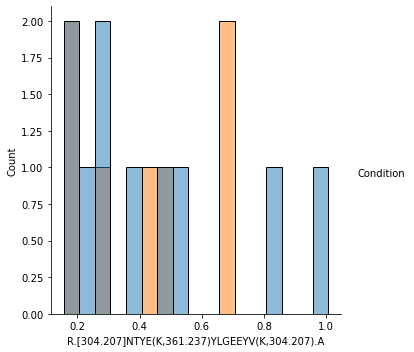

In [20]:
hist = sns.displot(data_processed, x = 'R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A', hue = 'Condition', binwidth = 0.05)

In [21]:
# sns.jointplot(x = data_processed['R.[304.207]YSHDF(N,-56.985)FH.I'], y = ['R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A'], hue = data_processed['Condition'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R.[304.207]YSHDF(N,-56.985)FH.I', ylabel='R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A'>

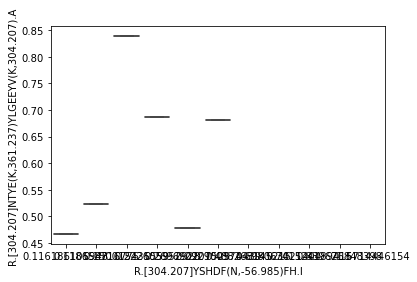

In [22]:
sns.boxplot('R.[304.207]YSHDF(N,-56.985)FH.I', 'R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A', data = data_processed)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R.[304.207]YSHDF(N,-56.985)FH.I', ylabel='Density'>

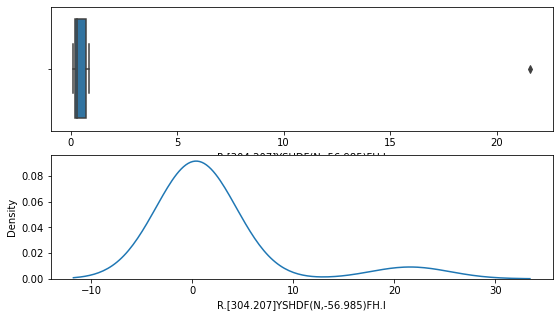

In [23]:
plt.figure(figsize = (9, 5))

plt.subplot(211)
sns.boxplot(data_processed['R.[304.207]YSHDF(N,-56.985)FH.I'])

plt.subplot(212)
sns.kdeplot(data_processed['R.[304.207]YSHDF(N,-56.985)FH.I'])

In [24]:
print('This distribution has skew', data_processed['K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V'].skew())
print('This distribution has kurtosis', data_processed['K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V'].kurt())

This distribution has skew 0.3201916296601555
This distribution has kurtosis 0.048240461160261816
